In [29]:
import plotly.express as px
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt


In [30]:
data = pd.read_csv('results/optimization_results_world.csv')

In [31]:
data = data.set_index('Country')

In [32]:
# Population data
# pop_data = pd.read_excel('../population_data_UN.xlsx', index_col=0, header = 1)
# pop_data = pop_data['Total Population, as of 1 January (thousands)']
# for col in data.columns[1:]: 
#     for country in data.index:
#         # print(country)
#         data[f'{col}_normalized']=data[col]/pop_data.loc[country]
#         # data[f'{col}_normalized']=data[col]/pop_data.loc[country]

In [33]:
for col in data.columns[1:]: 
    data[f'{col}_normalized']=data[col]/data['mean_load']


In [37]:
for col in data.columns[1:]: 
    data[f'{col}_normalized']=data[col]/data['mean_load']
    
for c in data.index.to_list(): 
    results = pd.read_pickle(f'results/{c}/optimization_results.pickle')
    data.loc[c, 'capacity_factor_wind'] = results['E_wind']/data.loc[c, 'P_wind']/8760
    data.loc[c, 'capacity_factor_pv'] = results['E_pv']/data.loc[c, 'P_pv']/8760
    data.loc[c, 'share_wind']=results['E_wind']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
    data.loc[c, 'share_pv']=results['E_pv']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
    data.loc[c, 'share_dispatchable'] = results['E_dispatch']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
    data.loc[c, 'E_destock']=results['E_destock']

In [35]:
data

,iso_alpha,mean_load,E_dispatch,P_dispatch,E_stock,P_pv,P_wind,mean_load_normalized,E_dispatch_normalized,P_dispatch_normalized,E_stock_normalized,P_pv_normalized,P_wind_normalized,efficiency_wind,efficiency_pv,efficiency_dispatch,E_destock
Country,,,,,,,,,,,,,,,,,
Afghanistan,AFG,810.466324,1.305492e+06,1133.330747,3.267777e+06,3453.846546,7669.253318,1.0,1610.790699,1.398369,4031.971257,4.261555,9.462766,0.005260,0.000612,0.001081,2.398239e+06
Albania,ALB,833.338813,1.008694e+06,954.271612,2.517564e+06,3064.156715,1872.838832,1.0,1210.425277,1.145118,3021.056567,3.676964,2.247392,0.000737,0.000644,0.001008,1.980923e+06
Algeria,DZA,7850.452511,9.442888e+06,11241.069336,1.123568e+07,18661.717824,9497.960692,1.0,1202.846283,1.431901,1431.214111,2.377152,1.209862,0.000208,0.000804,0.001220,4.783740e+06
Angola,AGO,1114.159589,1.417517e+06,1479.000000,3.963343e+06,4561.797753,4254.728832,1.0,1272.274670,1.327458,3557.249255,4.094385,3.818779,0.003257,0.000540,0.000832,3.023659e+06
Argentina,ARG,17627.853425,2.219507e+07,25596.000000,5.284213e+07,59596.596983,12796.424587,1.0,1259.090993,1.452020,2997.649883,3.380820,0.725921,0.000107,0.001708,0.001860,1.153815e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mozambique,MOZ,2007.986073,2.031239e+06,3127.551134,6.213561e+06,7909.593653,1865.636008,1.0,1011.579992,1.557556,3094.424456,3.939068,0.929108,0.000281,0.000722,0.001714,3.500438e+06
United Kingdom,GBR,41099.310046,4.502657e+07,62016.030552,4.639020e+07,110736.402529,53051.023594,1.0,1095.555373,1.508931,1128.734251,2.694362,1.290801,0.000249,0.000754,0.001198,5.238526e+07
Thailand,THA,21679.223174,3.034945e+07,27917.790534,6.803777e+07,99162.835470,42744.209389,1.0,1399.932442,1.287767,3138.385864,4.574095,1.971667,0.000937,0.000687,0.000917,5.535467e+07


## Normalized plots

Documentation on choropleth : https://plotly.com/python/choropleth-maps/

In [8]:
# Create basic choropleth map
fig = px.choropleth(data, locations='iso_alpha', color='E_dispatch_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable electricity needs (hours of average load)', color_continuous_scale='portland')
fig.show()
fig.write_html('figures/world_maps/dispatchable_energy_hours.html')

In [9]:
fig = px.choropleth(data, locations='iso_alpha', color='E_stock_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='Storage utilization (hours of average load)', color_continuous_scale='portland')
fig.show()
fig.write_html('figures/world_maps/dispatchable_energy_hours.html')

In [10]:
fig = px.choropleth(data, locations='iso_alpha', color='P_dispatch_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable capacity (normalized by average load)', color_continuous_scale='portland')
fig.show()

In [11]:
fig = px.choropleth(data, locations='iso_alpha', color='efficiency_dispatch', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable efficiency (capacity/energy)', color_continuous_scale='portland')
fig.show()

In [24]:
fig = px.choropleth(data, locations='iso_alpha', color='P_pv_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='PV weight', color_continuous_scale='portland')
fig.show()

In [39]:
fig = px.choropleth(data, locations='iso_alpha', color='capacity_factor_pv', hover_name='iso_alpha',
                    projection='natural earth', title='PV capacity factor', color_continuous_scale='portland',
                    hover_data={
                    'iso_alpha': True, 
                    'share_pv': True,    
                    'share_wind': True
         })
fig.show()

In [38]:
fig = px.choropleth(data, locations='iso_alpha', color='capacity_factor_wind', hover_name='iso_alpha',
                    projection='natural earth', title='Wind capacity factor', color_continuous_scale='portland',
                    hover_data={
                    'iso_alpha': True, 
                    'share_pv': True,    
                    'share_wind': True
         })
fig.show()

In [15]:
fig = px.choropleth(data, locations='iso_alpha', color='efficiency_pv', hover_name='iso_alpha',
                    projection='natural earth', title='PV efficiency (capacity/energy)', color_continuous_scale='portland')
fig.show()

# Absolute plots

In [16]:
fig = px.choropleth(data, locations='iso_alpha', color='E_dispatch', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable electricity needs (MWh)', color_continuous_scale='portland')
fig.show()

In [36]:
fig = px.choropleth(data, locations='iso_alpha', color='E_destock', hover_name='iso_alpha',
                    projection='natural earth', title='Storage utilization (MWh)', color_continuous_scale='portland')
fig.show()

In [18]:
fig = px.choropleth(data, locations='iso_alpha', color='P_dispatch', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable capacity (MW)', color_continuous_scale='portland')
fig.show()

In [19]:
fig = px.choropleth(data, locations='iso_alpha', color='P_pv', hover_name='iso_alpha',
                    projection='natural earth', title='PV capacity (MW)', color_continuous_scale='portland')
fig.show()

In [20]:
fig = px.choropleth(data, locations='iso_alpha', color='P_wind', hover_name='iso_alpha',
                    projection='natural earth', title='Wind capacity (MW)', color_continuous_scale='portland')
fig.show()

# Köppen Climate Classification

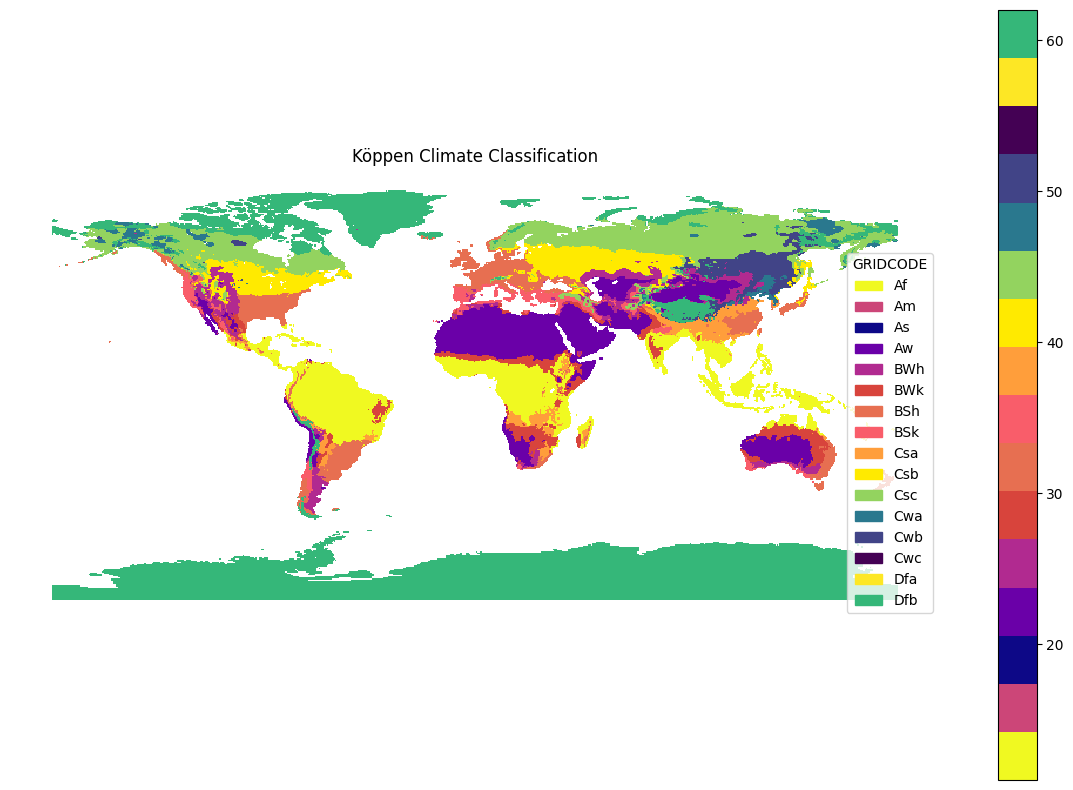

In [21]:
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
# Load the Köppen climate classification shapefile
shapefile_path = 'koppen_climates/c1976_2000_1.shp'
koppen_data = gpd.read_file(shapefile_path)

colors = [
    "#f0f921", "#cc4678", "#0d0887", "#6a00a8", "#b12a90", "#d8443c", "#e76f51", "#f95d6a",
    "#ff9e3b", "#ffea00", "#93d35f", "#2a788e", "#414487", "#440154", "#fde725", "#35b779"
]
cmap = ListedColormap(colors)
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
koppen_data.plot(column='GRIDCODE',cmap = cmap, ax=ax, legend=True)

legend_labels = {
    1: "Af",
    2: "Am",
    3: "As",
    4: "Aw",
    5: "BWh",
    6: "BWk",
    7: "BSh",
    8: "BSk",
    9: "Csa",
    10: "Csb",
    11: "Csc",
    12: "Cwa",
    13: "Cwb",
    14: "Cwc",
    15: "Dfa",
    16: "Dfb",
}
legend_handles = [Patch(color=colors[i-1], label=legend_labels[i]) for i in range(1, 17)]
ax.legend(handles=legend_handles, title='GRIDCODE', loc='lower right')
# ax.legend()
ax.set_title('Köppen Climate Classification')
ax.set_axis_off()
plt.show()

In [22]:
koppen_data

,ID,GRIDCODE,geometry
0,1,62,"POLYGON ((-37.50000 83.50000, -38.00000 83.500..."
1,2,62,"POLYGON ((-29.50000 83.50000, -37.00000 83.500..."
2,3,62,"POLYGON ((-46.00000 83.00000, -46.00000 83.500..."
3,4,62,"POLYGON ((-42.50000 83.50000, -39.50000 83.500..."
4,5,61,"POLYGON ((55.50000 81.00000, 55.50000 81.50000..."
...,...,...,...
2254,2255,61,"POLYGON ((-59.50000 -73.00000, -59.00000 -73.0..."
2255,2256,61,"POLYGON ((168.50000 -76.50000, 168.00000 -76.5..."
2256,2257,61,"POLYGON ((-66.00000 -77.00000, -66.50000 -77.0..."
2257,2258,61,"POLYGON ((-159.00000 -80.00000, -164.00000 -80..."
